Importa o modelo a ser fatiado e mapeado

In [16]:
import matplotlib.pyplot as plt
import gui
import files
from timer import Timer
from components.layer import Layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
choice = gui.ask_load_or_begin()
if choice == "Novo Projeto":
    path_input, file_name = gui.load_model(folders)
    [dpi, layer_height] = gui.ask_parameters_input()
    with Timer("Fase 0: "):
        Layer.create_layers(folders, path_input, file_name, dpi, layer_height)
elif choice == "Carregar Salvo":
    gui.find_saved_file(folders)
elif choice == "Cancelar":
    quit

#TODO: encontrar uma forma de jogar layerHight para o slicing W/images (POSSIVELMENTE COM O RUNSINGLEMODEL)

Fase 0: 
criando as camadas
First arg: /home/matheus/TangranV2/input/stl_models/conecomplicado90.stl
Second arg: 300.0
Script executed from: /home/matheus/TangranV2
Script executed from: /home/matheus/TangranV2/input/sliced
Script executed from: /home/matheus/TangranV2
Script executed from: /home/matheus/TangranV2/slicing-with-images
number of degenerated triangles = 0
eps = 0.004
max thickness = 2
rounded plane spacing spacing = 2
model zmin = -25, model zmax = 100, first plane Z = -26.996, number of planes = 65
-Incremental, conecomplicado90.stl, thickness = 2, #T = 1140, #P = 63, #S = 11177, 0.001096s (slicing), 0.006381s (polygon assembling), 0.025282s (total), *K: 9.80439


/bin/bash: /home/matheus/anaconda3/lib/python3.11/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
rm: cannot remove '*.svg': No such file or directory
rm: cannot remove '*.png': No such file or directory




writing image: ../input/sliced/layer_000.pgm


writing image: ../input/sliced/layer_001.pgm


writing image: ../input/sliced/layer_002.pgm


writing image: ../input/sliced/layer_003.pgm


writing image: ../input/sliced/layer_004.pgm


writing image: ../input/sliced/layer_005.pgm


writing image: ../input/sliced/layer_006.pgm


writing image: ../input/sliced/layer_007.pgm


writing image: ../input/sliced/layer_008.pgm


writing image: ../input/sliced/layer_009.pgm


writing image: ../input/sliced/layer_010.pgm


writing image: ../input/sliced/layer_011.pgm


writing image: ../input/sliced/layer_012.pgm


writing image: ../input/sliced/layer_013.pgm


writing image: ../input/sliced/layer_014.pgm


writing image: ../input/sliced/layer_015.pgm


writing image: ../input/sliced/layer_016.pgm


writing image: ../input/sliced/layer_017.pgm


writing image: ../input/sliced/layer_018.pgm


writing image: ../input/sliced/layer_019.pgm


writing image: ../input/sliced/layer_020.pgm


writing ima

Paredes Finas

In [17]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
#[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
[d_ext, sob_ext_per] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 1: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        #c.make_thin_walls(folders, nozzle_diam_external, nozzle_diam_internal)
        c.make_thin_walls(folders, d_ext, sob_ext_per)
        %reset_selective -f "c"
%reset_selective -f "camadas"
# TODO: arvore de paredes finas
# TODO: quando duas áreas se encontram
# TODO: limite de parede diam minimo
# TODO arrumar para origens extremamente pequenas, ignorar da problema
# TODO arrumar casos onde a beirada esta vazndo criando areas triangulares distantes
# FIXME: Precisa mesmo separar linha 1 2 topo e baixo? muitos elementos estão sendo criados

Fase 1: Camada: 0
Criando paredes finas
Total de [Criando paredes finas] : 1.1933693885803223
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0005712509155273438
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.01949000358581543
Total de [Fase 1: Camada: 0] : 1.2896978855133057
Fase 1: Camada: 1
Criando paredes finas
Total de [Criando paredes finas] : 0.8206424713134766
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0003135204315185547
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.01083230972290039
Total de [Fase 1: Camada: 1] : 0.8537032604217529
Fase 1: Camada: 2
Criando paredes finas
Total de [Criando paredes finas] : 0.8533284664154053
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0003337860107421875
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.016387939453125
Total de [Fase 1: Camada: 2] : 0.90730

Contornos

In [18]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[void_max,external_max,internal_max] = gui.ask_parameters_offsets()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 2: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_offsets(folders, void_max, external_max, internal_max)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 2: Camada: 0
Criando Lvls
Ilha: I_000 Número de Níveis: 2
Total de [Criando Lvls] : 0.2928445339202881
Criando os loops
Total de [Criando os loops] : 0.09094119071960449
Criando regiões de influência
Total de [Criando regiões de influência] : 0.015188455581665039
Criando as regiões de Offset
Total de [Criando as regiões de Offset] : 0.04810810089111328
Retirando regiões da camada
['Lvl_000', 0, 0] Perdendo total:32 maior void:0.003329633740288568Bw -> aceito
['Lvl_001', 0, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_000', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_001', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
Total de [Retirando regiões da camada] : 0.13927531242370605
Reunindo todos os loops em uma unica imagem
Total de [Reunindo todos os loops em uma unica imagem] : 0.011397838592529297
salvando imagens das regiões
deletado: /L_000/I_000/offsets
Total de [salvando imagens das regiões] : 0.08057928085327148
Total de [Fase 2: Camada: 0] : 0.70491743087768

Pontes

In [19]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd
import numpy as np
from components import images_tools as it

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[n_max, d_int, sob_int_per] = gui.ask_parameters_bridges()
camadas = folders.load_layers_hdf5()
last_prohibited_areas = np.zeros(camadas[0].base_frame)
for i,c in enumerate(camadas):
    with Timer("Fase 3: Camada: " + str(i)):
        if i%2 == 1:
            last_image = it.rotate_img_cw(last_prohibited_areas )
        elif i%2 == 0:
            last_image = it.rotate_img_ccw(last_prohibited_areas )
        if i >= 2:
            if i%2 == 1:
                second_last_image = it.rotate_img_cw(camadas[i - 1].prohibited_areas)
            elif i%2 == 0:
                second_last_image = it.rotate_img_ccw(camadas[i - 1].prohibited_areas)
        else:
            second_last_image = np.zeros_like(last_image)
        c.prohibited_areas = last_image
        sum_prohibited_areas = it.sum_imgs([last_image, second_last_image])
        last_prohibited_areas = c.make_bridges(folders, n_max, d_int, sob_int_per, len(camadas), sum_prohibited_areas)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
%reset_selective -f "camadas"

Fase 3: Camada: 0
Criando pontes de Offset
Total de [Criando pontes de Offset] : 0.49239158630371094
Criando pontes de Zigzag
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 1.8952691555023193
Criando pontes de Crossover
Elemento: ('Reg_000', 'Reg_001') Maior prioridade: 0
Total de [Criando pontes de Crossover] : 0.049727439880371094
Retirando pontes da Camada
Total de [Retirando pontes da Camada] : 0.009808778762817383
Gerando áreas proibidas
Total de [Gerando áreas proibidas] : 0.0001437664031982422
salvando imagens das regiões
deletado: /L_000/I_000/bridges
Total de [salvando imagens das regiões] : 0.07986688613891602
Total de [Fase 3: Camada: 0] : 2.5548815727233887
Fase 3: Camada: 1
Criando pontes de Offset
Total de [Criando pontes de Offset] : 0.6334929466247559
Criando pontes de Zigzag
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 2.3432462215423584
Criando pontes de Crossover
Elemento: ('Reg_000', 'Reg_001') Maior prioridade: 0
Total de [Criando pontes de 

Zigzags

In [20]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        c.make_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"


Fase 4: Camada: 0
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 1.0591845512390137
salvando imagens das regiões
deletado: /L_000/I_000/zigzags
Total de [salvando imagens das regiões] : 0.0036575794219970703
Total de [Fase 4: Camada: 0] : 1.1060645580291748
Fase 4: Camada: 1
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 1.8689346313476562
salvando imagens das regiões
deletado: /L_001/I_000/zigzags
Total de [salvando imagens das regiões] : 0.0029518604278564453
Total de [Fase 4: Camada: 1] : 1.9110589027404785
Fase 4: Camada: 2
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 2.648967742919922
salvando imagens das regiões
deletado: /L_002/I_000/zigzags
Total de [salvando imagens das regiões] : 0.0028104782104492188
Total de [Fase 4: Camada: 2] : 2.694705009460449
Fase 4: Camada: 3
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 1.5847318172454834
salvando imagens das regiões
deletado: /

iMAGEM DO MAPEAMENTO

Fase 4: Camada: 0


Total de [Fase 4: Camada: 0] : 0.18521833419799805
Fase 4: Camada: 1


Total de [Fase 4: Camada: 1] : 0.12038898468017578
Fase 4: Camada: 2


Total de [Fase 4: Camada: 2] : 0.11904025077819824
Fase 4: Camada: 3


Total de [Fase 4: Camada: 3] : 0.11649584770202637
Fase 4: Camada: 4


Total de [Fase 4: Camada: 4] : 0.12077045440673828
Fase 4: Camada: 5


Total de [Fase 4: Camada: 5] : 0.12578177452087402
Fase 4: Camada: 6


Total de [Fase 4: Camada: 6] : 0.11515545845031738
Fase 4: Camada: 7


Total de [Fase 4: Camada: 7] : 0.11688041687011719
Fase 4: Camada: 8


Total de [Fase 4: Camada: 8] : 0.1161189079284668
Fase 4: Camada: 9


Total de [Fase 4: Camada: 9] : 0.12314295768737793
Fase 4: Camada: 10


Total de [Fase 4: Camada: 10] : 0.11991357803344727
Fase 4: Camada: 11


Total de [Fase 4: Camada: 11] : 0.12060666084289551
Fase 4: Camada: 12


Total de [Fase 4: Camada: 12] : 0.12183547019958496
Fase 4: Camada: 13


Total de [Fase 4: Camada: 13] : 0.11525702476501465

/tmp/ipykernel_37980/2409409764.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()




Total de [Fase 4: Camada: 21] : 0.13905644416809082
Fase 4: Camada: 22


Total de [Fase 4: Camada: 22] : 0.1114799976348877
Fase 4: Camada: 23


Total de [Fase 4: Camada: 23] : 0.11979079246520996
Fase 4: Camada: 24


Total de [Fase 4: Camada: 24] : 0.12312102317810059
Fase 4: Camada: 25


Total de [Fase 4: Camada: 25] : 0.1267986297607422
Fase 4: Camada: 26


Total de [Fase 4: Camada: 26] : 0.12301421165466309
Fase 4: Camada: 27


Total de [Fase 4: Camada: 27] : 0.12628889083862305
Fase 4: Camada: 28


Total de [Fase 4: Camada: 28] : 0.11596560478210449
Fase 4: Camada: 29


Total de [Fase 4: Camada: 29] : 0.1302354335784912
Fase 4: Camada: 30


Total de [Fase 4: Camada: 30] : 0.11930012702941895
Fase 4: Camada: 31


Total de [Fase 4: Camada: 31] : 0.131591796875
Fase 4: Camada: 32


Total de [Fase 4: Camada: 32] : 0.12049126625061035
Fase 4: Camada: 33


Total de [Fase 4: Camada: 33] : 0.11831283569335938
Fase 4: Camada: 34


Total de [Fase 4: Camada: 34] : 0.1136929988861084
Fase 4

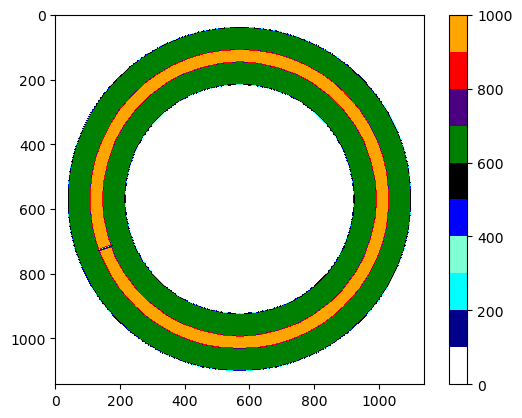

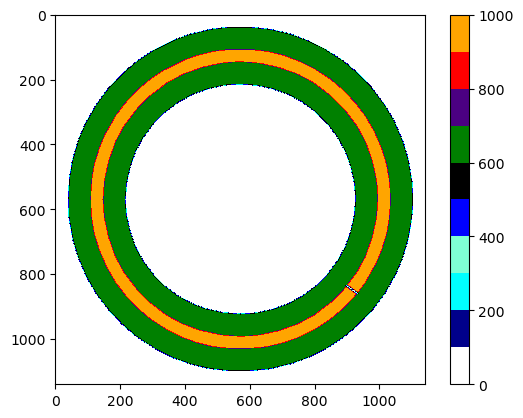

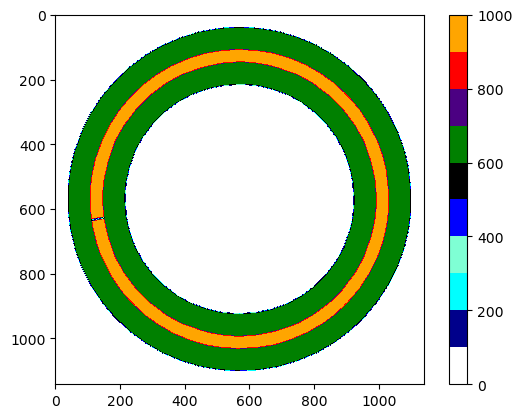

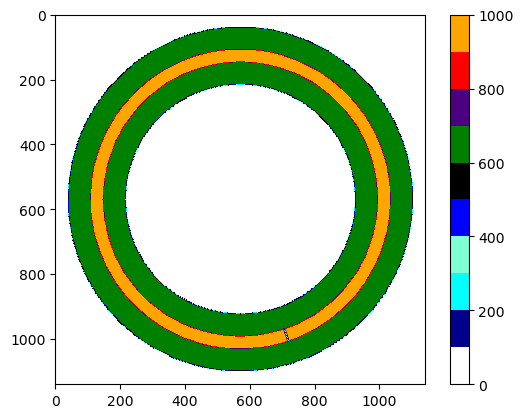

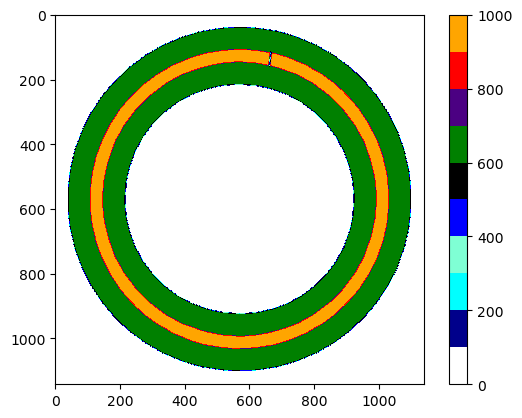

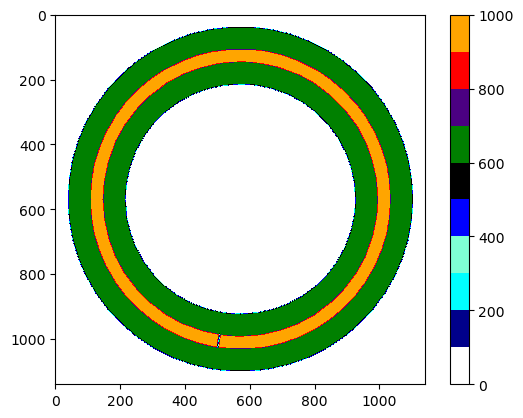

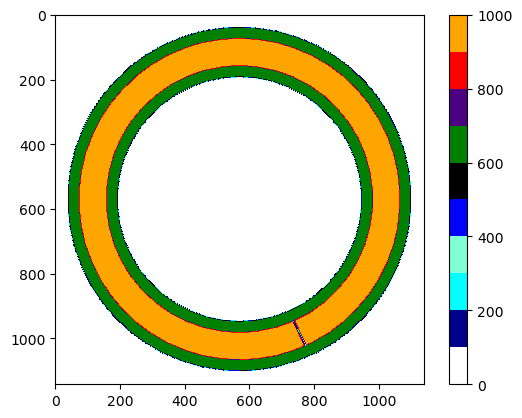

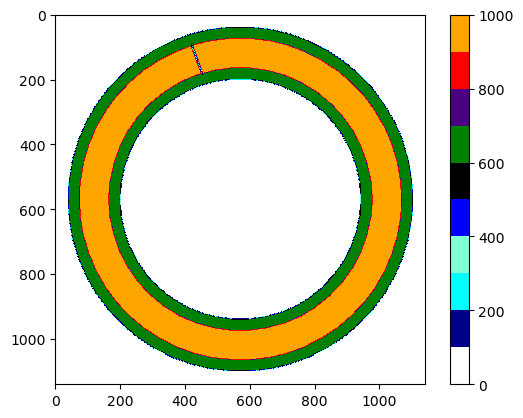

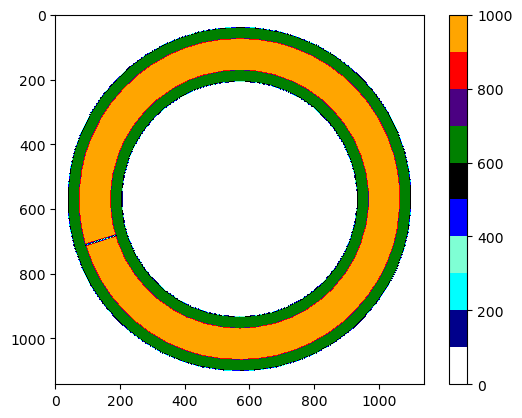

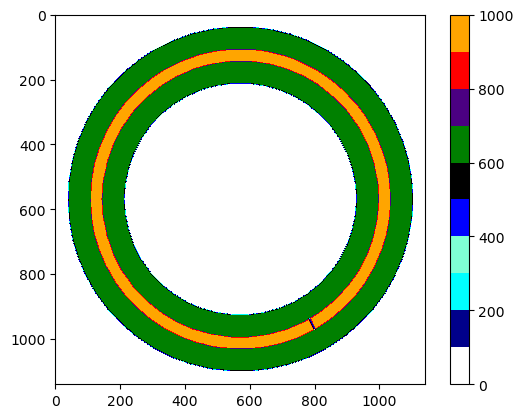

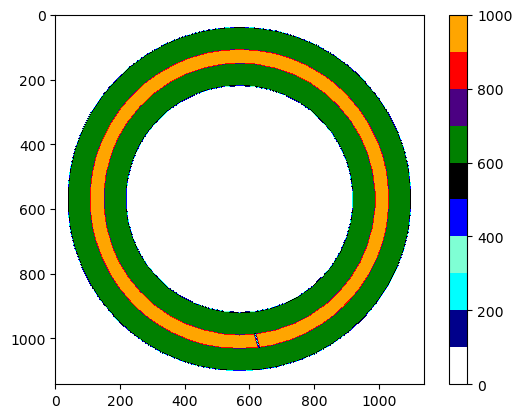

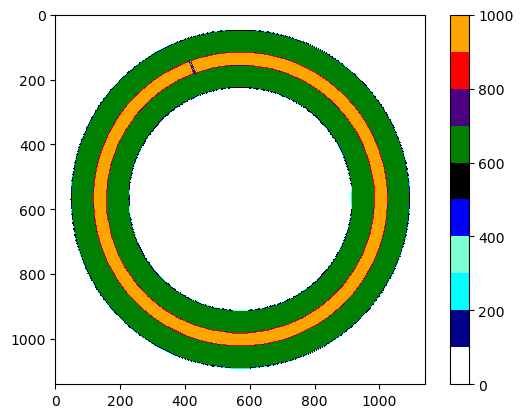

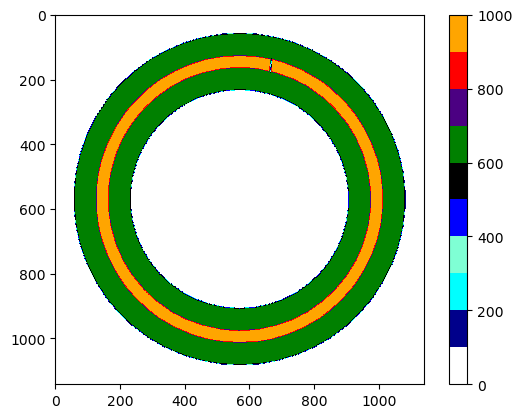

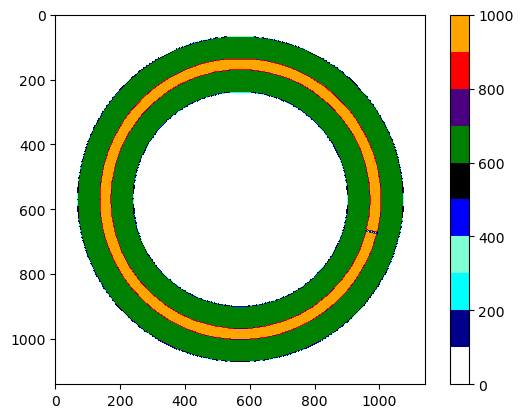

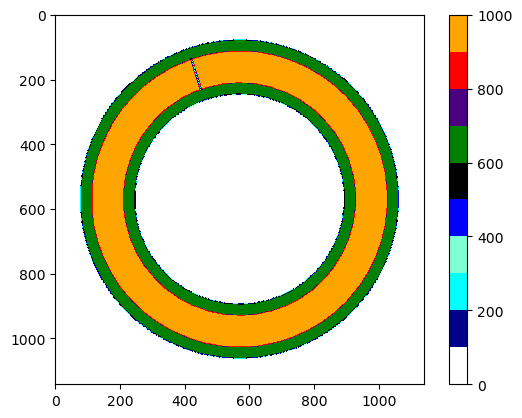

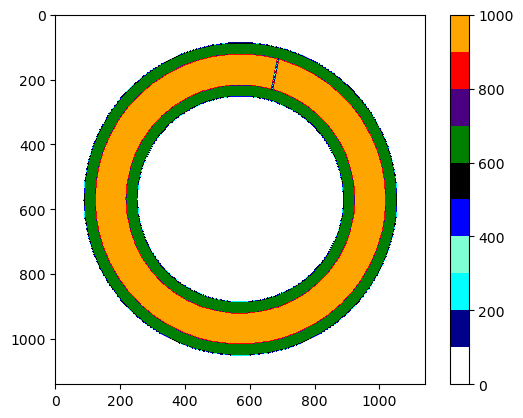

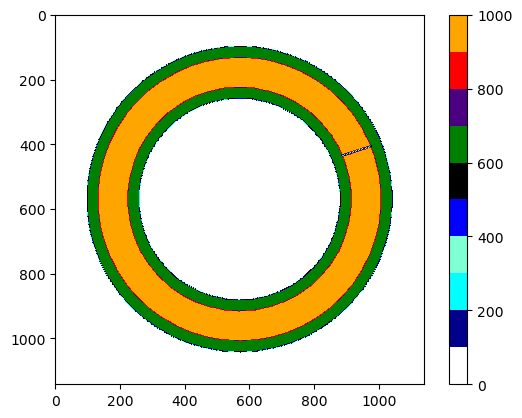

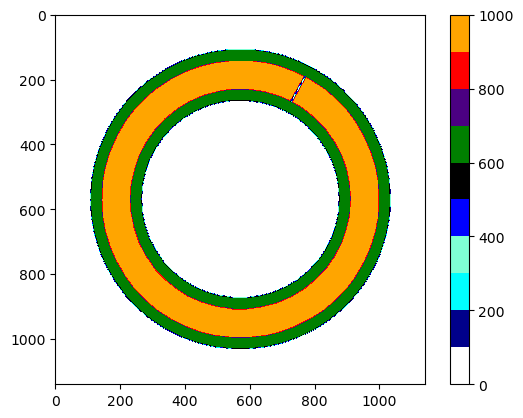

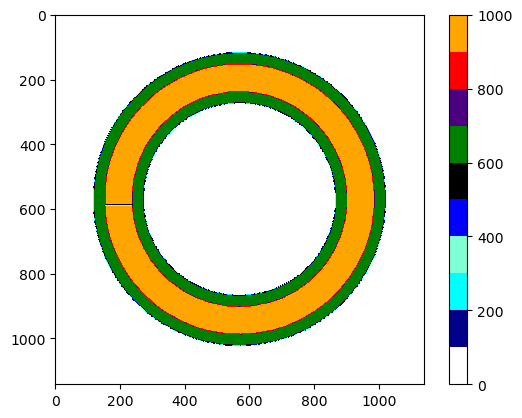

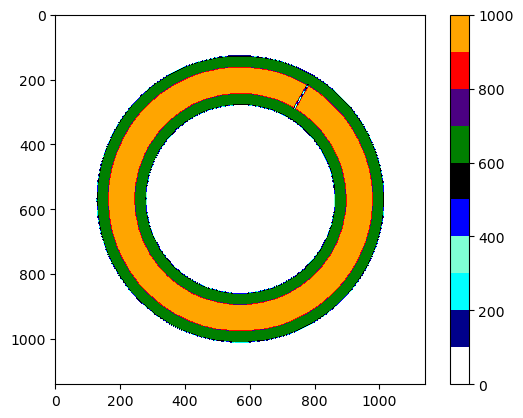

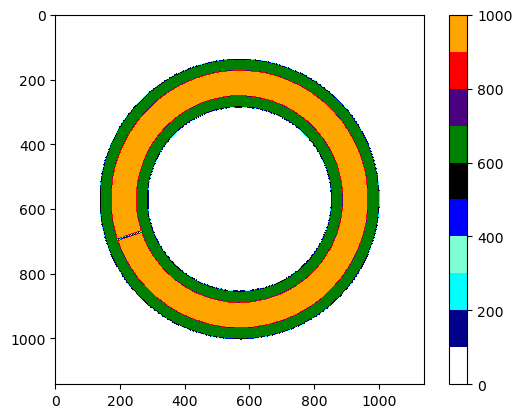

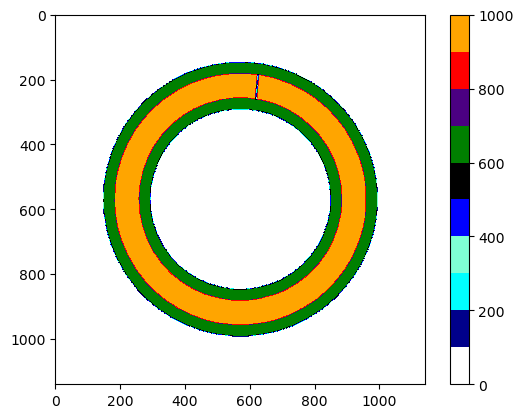

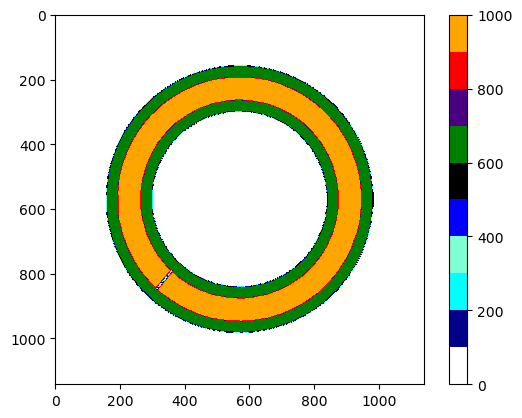

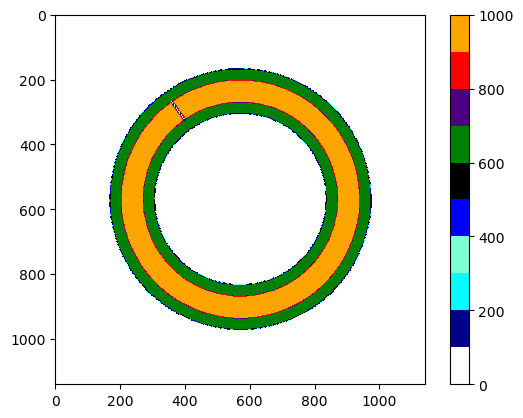

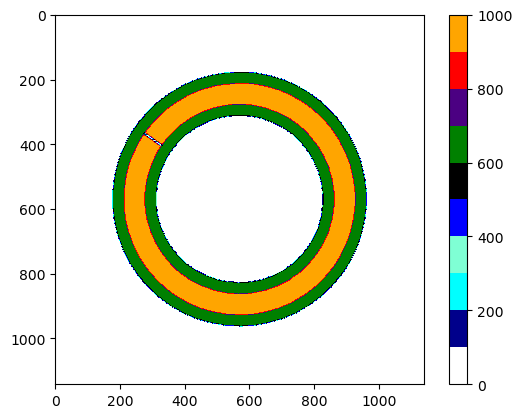

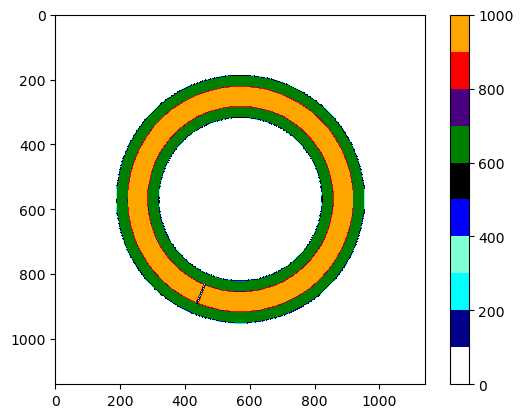

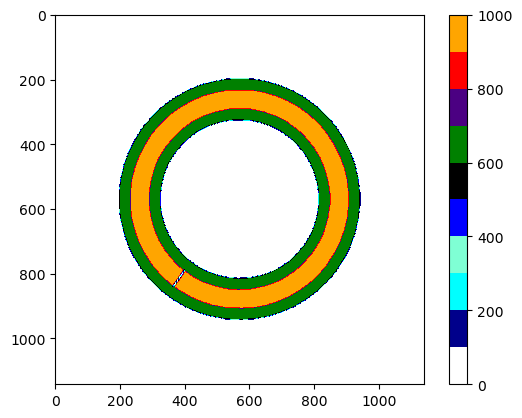

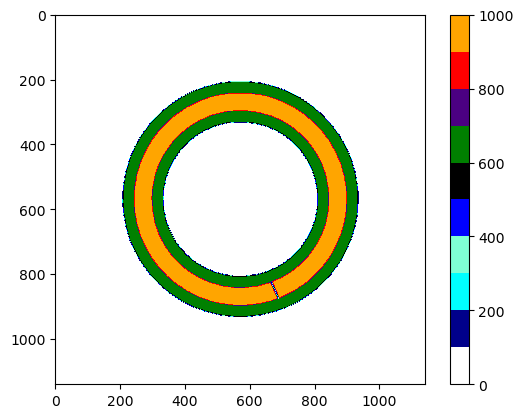

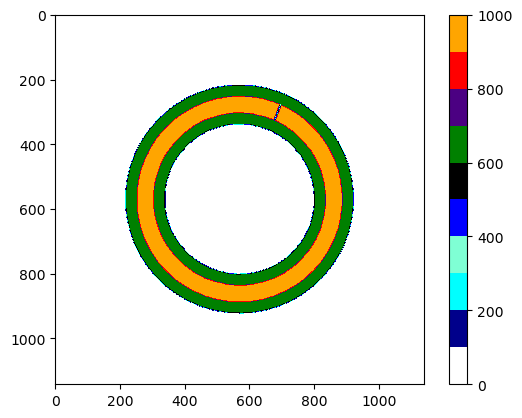

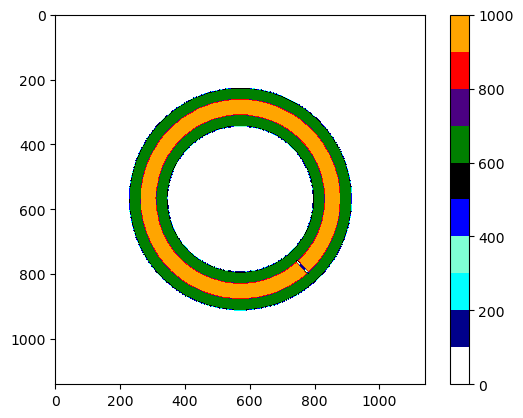

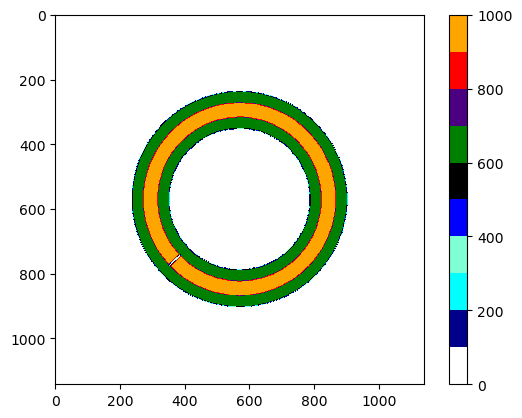

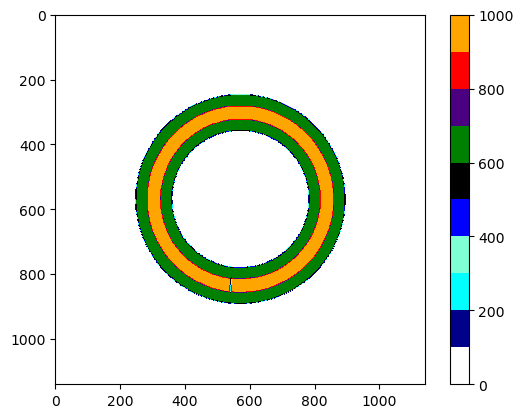

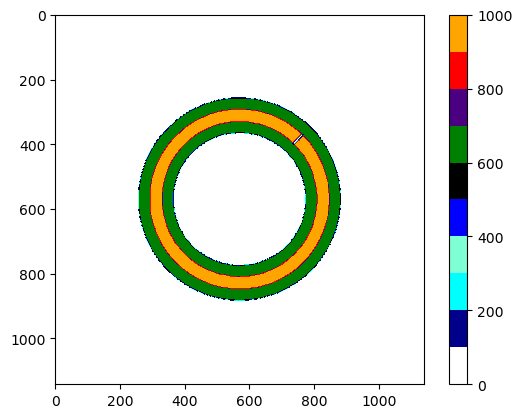

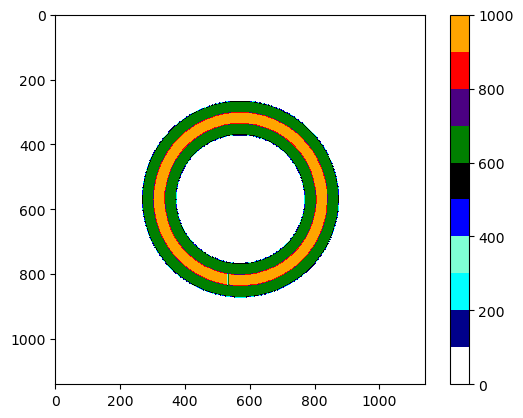

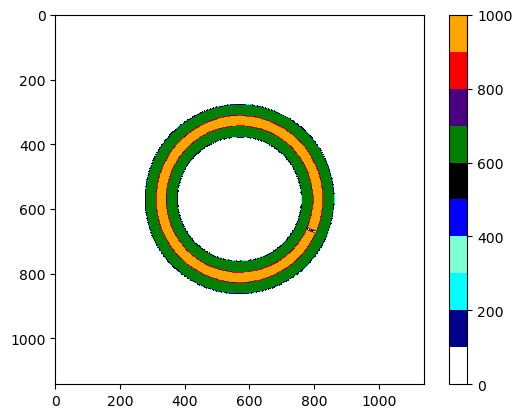

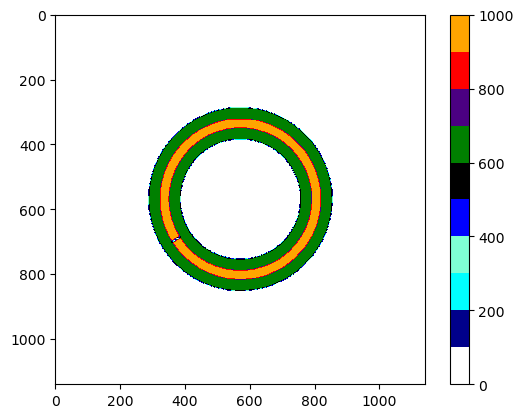

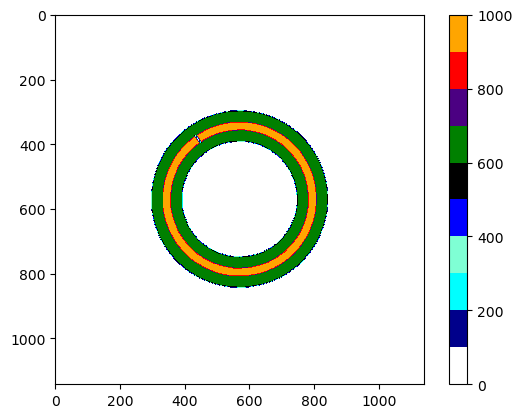

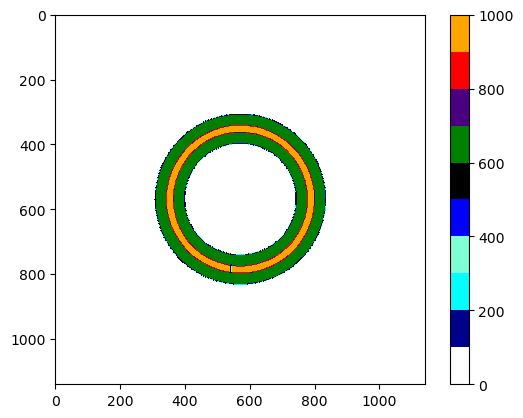

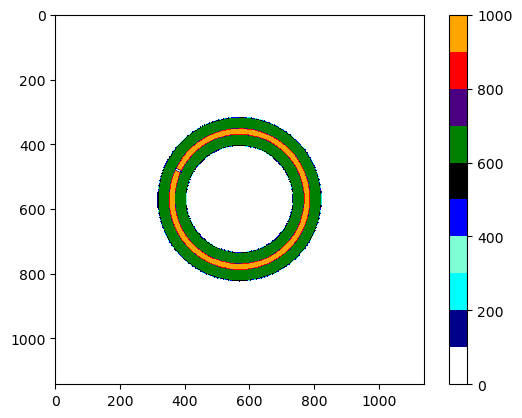

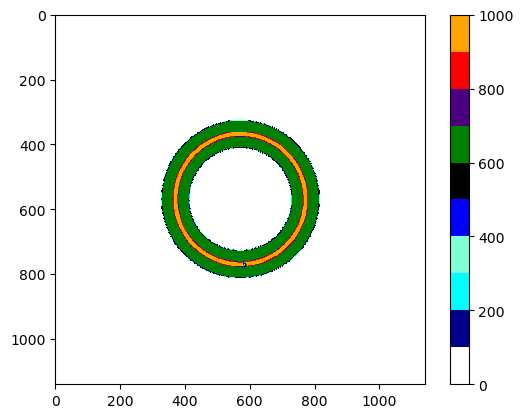

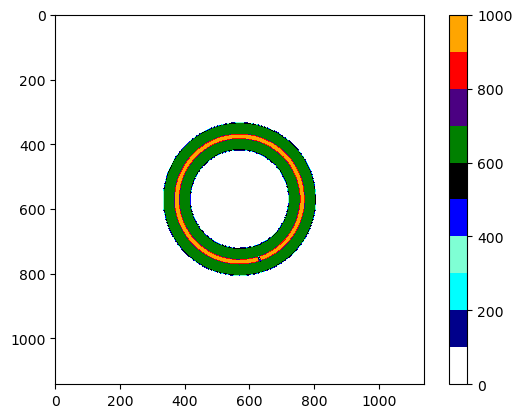

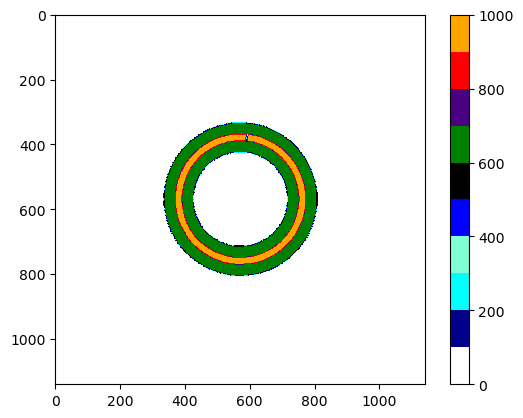

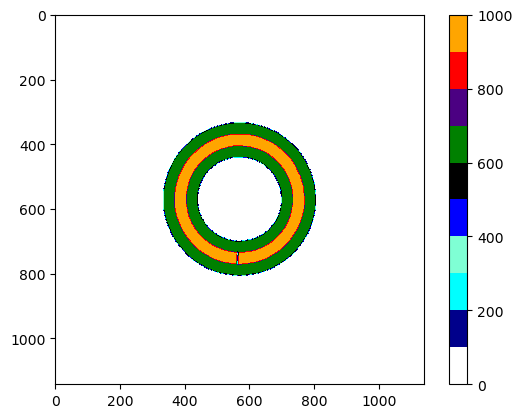

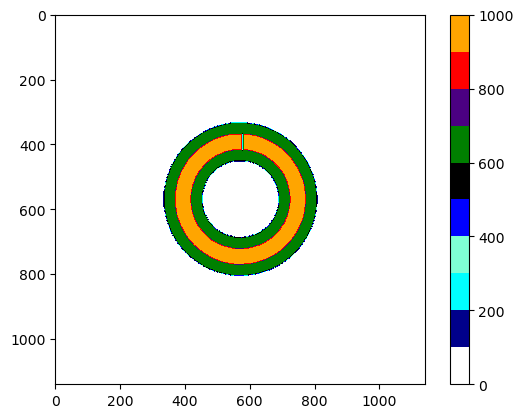

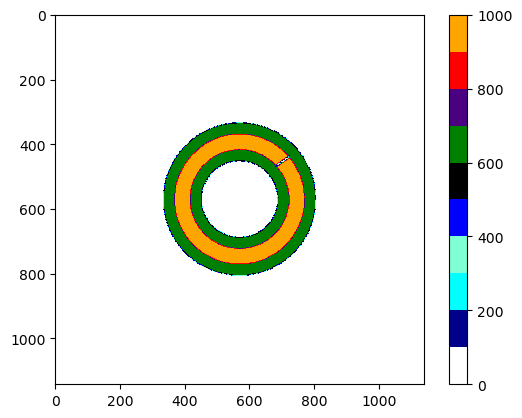

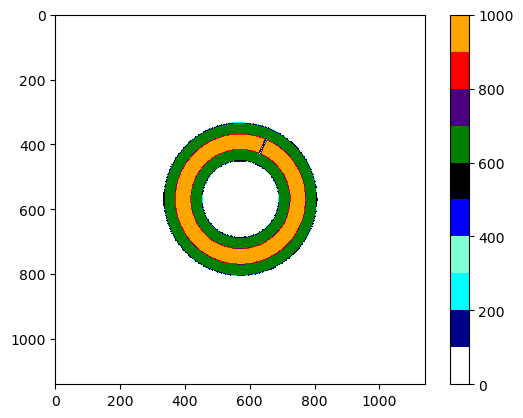

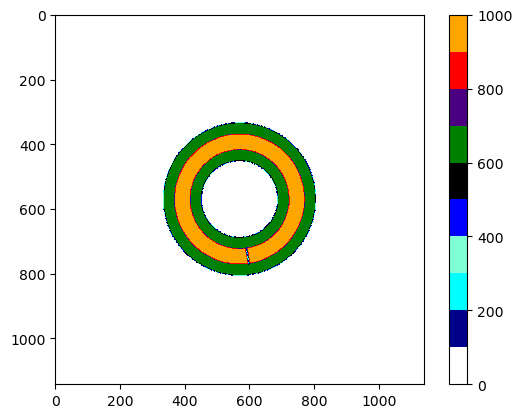

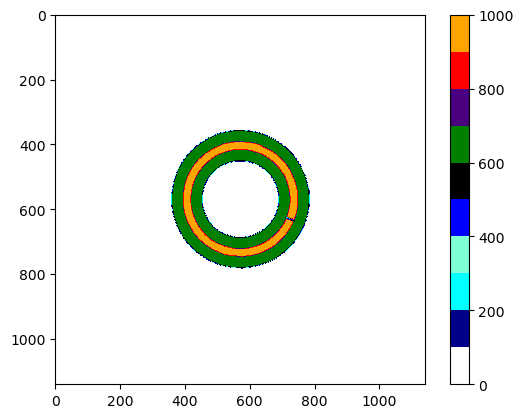

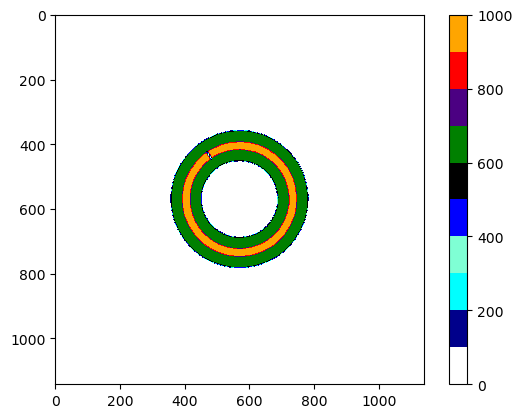

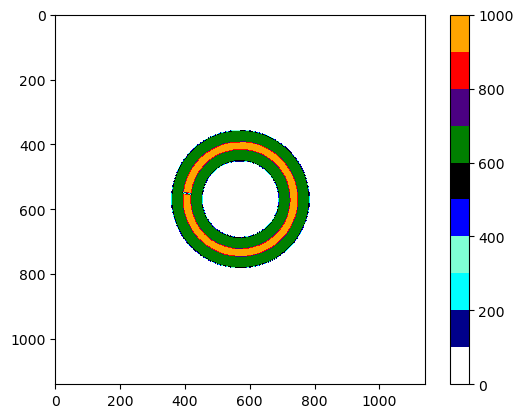

In [21]:
import gui
import files
from timer import Timer
from components import images_tools as it
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.colors
import os

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for c in camadas:
    folders.load_islands_hdf5(c)
tangran_cmap = matplotlib.colors.ListedColormap(["white","darkblue","aqua","aquamarine","blue","black","green","indigo","red","orange"])
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        plt.figure()
        img_mapping = it.final_mapping(c, folders)
        plt.imshow(img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.imsave("aaa.png",img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.colorbar()
        print('\n')

ROTAS

Rotas de Offset

In [22]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

amendment_size = 0.7 #porcentagem do tamanho da poca de deposicao de material
for c in camadas:
    with Timer("Making offset routes"):
        c.make_offset_routes(amendment_size, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.031429290771484375
Total de [Making offset routes] : 0.7857892513275146
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.02968764305114746
Total de [Making offset routes] : 0.7840805053710938
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.030289173126220703
Total de [Making offset routes] : 0.769726037979126
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.03106832504272461
Total de [Making offset routes] : 0.7728214263916016
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.029426097869873047
Total de [Making offset routes] : 0.7652409076690674
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.02931356430053711
Total de [Making offset routes] : 0.7805688381195068
Making offset routes
salvando im

Rotas de pontes

In [1]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[sob_int_ext_per] = gui.ask_parameters_internal_routes()

with Timer(f"Making bridges routes"):
    for c in camadas:
        with Timer(f"Camada: {c.name}"):
            c.make_bridges_routes(folders, sob_int_ext_per)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Making bridges routes
Camada: L_000
Making Offset bridges routes
Total de [Making Offset bridges routes] : 0.0003070831298828125
Making Zigzag bridges routes
Total de [Making Zigzag bridges routes] : 6.580352783203125e-05
Making Crossover bridges routes
sequncia corrigida, b e c trocado
sequncia corrigida, b e c trocado
Total de [Making Crossover bridges routes] : 8.339648008346558
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.03739762306213379
Total de [Camada: L_000] : 8.503484010696411
Camada: L_001
Making Offset bridges routes
Total de [Making Offset bridges routes] : 0.00011444091796875
Making Zigzag bridges routes
Total de [Making Zigzag bridges routes] : 4.1961669921875e-05
Making Crossover bridges routes
sequncia corrigida, b e c trocado
sequncia corrigida, b e c trocado
Total de [Making Crossover bridges routes] : 10.650970935821533
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.03583836555480957
Total de [Camada: L_001] : 10.788005

Rotas de Ziguezague

In [2]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making zigzag routes"):
        c.make_zigzag_routes(folders)
        c.connect_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"



Making zigzag routes
criando as rotas de zigzag, camada:L_000
Total de [criando as rotas de zigzag, camada:L_000] : 0.03165030479431152
salvando imagens das rotas
deletado: /L_000/I_000/zigzags
Total de [salvando imagens das rotas] : 0.002780437469482422
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.0023272037506103516
Conectando regiões de zigzag
Total de [Conectando regiões de zigzag] : 0.0015578269958496094
salvando grafos
Total de [salvando grafos] : 0.040253639221191406
Total de [Making zigzag routes] : 0.14568209648132324
Making zigzag routes
criando as rotas de zigzag, camada:L_001
Total de [criando as rotas de zigzag, camada:L_001] : 0.023322105407714844
salvando imagens das rotas
deletado: /L_001/I_000/zigzags
Total de [salvando imagens das rotas] : 0.0027163028717041016
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.0018198490142822266
Conectando regiões de zigzag
Total de [Conectando regiões de zigzag] : 0.0011644363403320

WEAVING

In [3]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[iwflag] = gui.ask_parameters_weaving()
for c in camadas:
    with Timer("Fase 5 b"):
        c.internal_weaving(iwflag, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 0.5697705745697021
salvando rotas
deletado: /L_000/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.046283721923828125
Total de [Fase 5 b] : 0.6164922714233398
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 0.47905635833740234
salvando rotas
deletado: /L_001/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.043672800064086914
Total de [Fase 5 b] : 0.5230348110198975
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 0.4762129783630371
salvando rotas
deletado: /L_002/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.0445408821105957
Total de [Fase 5 b] : 0.5210444927215576
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 0.5024769306182861
salvando rotas
deletado: /L_003/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.04416966438293457

Rotas de Thin Walls

In [4]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Fase 5"):
        with Timer("Making thin walls routes"):
            c.make_thin_wall_routes(folders)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.022752046585083008
salvando imagens das rotas
Total de [salvando imagens das rotas] : 7.3909759521484375e-06
Total de [Making thin walls routes] : 0.0229949951171875
Total de [Fase 5] : 0.02308797836303711
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.0181577205657959
salvando imagens das rotas
Total de [salvando imagens das rotas] : 5.9604644775390625e-06
Total de [Making thin walls routes] : 0.018358230590820312
Total de [Fase 5] : 0.018372297286987305
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.02047419548034668
salvando imagens das rotas
Total de [salvando imagens das rotas] : 5.9604644775390625e-06
Total de [Making thin walls routes] : 0.020695209503173828
Total de [Fase 5] : 0.020711660385131836
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.018839359283447266
salvando imagens das rotas
Total de 

Encontrando o lugar onde será o começo da trilha de cada ilha

In [5]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.islands_path_starts(folders)

%reset_selective -f "camadas"                        

Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0014958381652832031
Total de [Encontrando ponto de união ext-int] : 0.008200883865356445
Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.001102447509765625
Total de [Encontrando ponto de união ext-int] : 0.007590770721435547
Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0009729862213134766
Total de [Encontrando ponto de união ext-int] : 0.007234096527099609
Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0010306835174560547
Total de [Encontrando ponto de união ext-int] : 0.007361650466918945
Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0011320114135742188
Total de [Encontrando ponto de união ext-int] : 0.008424758911132812
Encontrando ponto de união ext-int
s

Unificando rotas EXTERNAS nas camadas

In [6]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 6"):
        c.close_routes_external(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"
    

Fase 6
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.2074415683746338
Conectando pontes de Crossover
salto:  [697, 186]
Total de [Conectando pontes de Crossover] : 0.6660037040710449
Total de [Conectando rotas externas] : 1.0016429424285889
salvando imagens das rotas
deletado: /L_000/I_000/external_tree_route
Total de [salvando imagens das rotas] : 0.12857508659362793
Total de [Fase 6] : 1.1306047439575195
Fase 6
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.20725178718566895
Conectando pontes de Crossover
salto:  [837, 876]
Total de [Conectando pontes de Crossover] : 0.6064496040344238
Total de [Conectando rotas externas] : 0.9383649826049805
salvando imagens das rotas
deletado: /L_001/I_000/external_tree_route
Total de [salvando imagens das rotas] : 0.1118013858795166
Total de [Fase 6] : 1.0504326820373535
Fase 6
Conectando rotas externas
Conectando pontes de Offset
Total de [Conecta

Unificando rotas INTERNAS nas camadas

In [7]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 7"):
        c.close_routes_internal(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.00018668174743652344
rotas internas inexistentes
salvando imagens das rotas
deletado: /L_000/I_000/internal_tree_route
Total de [salvando imagens das rotas] : 0.004483699798583984
Total de [Fase 7] : 0.13863778114318848
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.0004899501800537109
rotas internas inexistentes
salvando imagens das rotas
deletado: /L_001/I_000/internal_tree_route
Total de [salvando imagens das rotas] : 0.0047512054443359375
Total de [Fase 7] : 0.13226532936096191
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.00020647048950195312
rotas internas inexistentes
salvando imagens das rotas
deletado: /L_002/I_000/internal_tree_route
Total de [salvando imagens das rotas] : 0.005831241607666016
Total de [Fase 7] : 0.15212440490722656
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.00035381317138671875
rotas internas 

Unindo rotas de thin walls

In [8]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 8"):
        c.close_routes_thinwalls(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0011107921600341797
salvando imagens das rotas
deletado: /L_000/I_000/thinwalls_tree_route/sequence
deletado: /L_000/I_000/thinwalls_tree_route/saltos
Total de [salvando imagens das rotas] : 0.04465961456298828
Total de [Fase 8] : 0.06566071510314941
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0008857250213623047
salvando imagens das rotas
deletado: /L_001/I_000/thinwalls_tree_route/sequence
deletado: /L_001/I_000/thinwalls_tree_route/saltos
Total de [salvando imagens das rotas] : 0.04569673538208008
Total de [Fase 8] : 0.06338715553283691
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0007002353668212891
salvando imagens das rotas
deletado: /L_002/I_000/thinwalls_tree_route/sequence
deletado: /L_002/I_000/thinwalls_tree_route/saltos
Total de [salvando imagens das rotas] : 0.043422698974609375
Total de [Fase 8] : 0.0634150505065918
Fase 8
Convertendo parede

Unindo todas as rotas

In [9]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.close_final_path(folders)

%reset_selective -f "camadas"


Encontrando ponto de união ext-int
Total de [Encontrando ponto de união ext-int] : 0.00010585784912109375
Conectando todas as partes
Total de [Conectando todas as partes] : 0.018525362014770508
salvando imagens das rotas
deletado: /L_000/I_000/island_route
[[737, 120], [736, 119], [735, 119], [0, 0], [697, 186], [742, 202], [786, 226], [838, 265], [876, 303], [913, 352], [939, 399], [960, 458], [972, 512], [975, 559], [941, 558], [938, 515], [909, 415], [882, 367], [851, 326], [815, 290], [770, 256], [726, 232], [675, 214], [621, 202], [522, 202], [419, 231], [374, 255], [331, 287], [288, 330], [256, 373], [232, 418], [203, 521], [201, 595], [215, 674], [233, 725], [257, 769], [291, 814], [327, 850], [372, 884], [416, 908], [516, 937], [559, 941], [622, 938], [727, 908], [771, 884], [816, 850], [851, 815], [885, 770], [909, 726], [927, 675], [939, 621], [941, 584], [974, 582], [971, 634], [941, 737], [915, 786], [876, 838], [839, 875], [790, 912], [738, 940], [684, 959], [630, 971], [5

Gerando o Código G

In [10]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[vel_int, vel_ext, vel_thin_wall, vel_vazio, p_religamento, p_desligamento, p_entre_int_ext, p_entre_camadas, substratoy, substratox, cortey, cortex] = gui.ask_parameters_Gcode()
coords_substrato = [substratoy, substratox]
coords_corte = [cortey, cortex]
camadas = folders.load_layers_hdf5()

#layer_heights = [10+2.9+3+(i*1.5) for i,x in enumerate(camadas)]
layer_heights = [20+8+2+(i*1.5) for i,x in enumerate(camadas)]
with Timer("Cuspindo o Gcode"):
    path_tools.layers_to_Gcode(camadas, 
                               folders, 
                               vel_int,
                               vel_ext, 
                               vel_vazio,
                               vel_thin_wall, 
                               p_religamento,
                               p_desligamento,
                               p_entre_int_ext,
                               p_entre_camadas,
                               layer_heights,
                               coords_substrato,
                               coords_corte,
                               )
%reset_selective -f "camadas"

Cuspindo o Gcode
nome: L_000/I_000
[[737, 120], [736, 119], [735, 119], [0, 0], [697, 186], [742, 202], [786, 226], [838, 265], [876, 303], [913, 352], [939, 399], [960, 458], [972, 512], [975, 559], [941, 558], [938, 515], [909, 415], [882, 367], [851, 326], [815, 290], [770, 256], [726, 232], [675, 214], [621, 202], [522, 202], [419, 231], [374, 255], [331, 287], [288, 330], [256, 373], [232, 418], [203, 521], [201, 595], [215, 674], [233, 725], [257, 769], [291, 814], [327, 850], [372, 884], [416, 908], [516, 937], [559, 941], [622, 938], [727, 908], [771, 884], [816, 850], [851, 815], [885, 770], [909, 726], [927, 675], [939, 621], [941, 584], [974, 582], [971, 634], [941, 737], [915, 786], [876, 838], [839, 875], [790, 912], [738, 940], [684, 959], [630, 971], [559, 975], [508, 970], [459, 959], [400, 938], [356, 914], [304, 875], [266, 837], [227, 785], [203, 741], [184, 688], [170, 628], [166, 582], [172, 503], [202, 402], [226, 357], [263, 307], [308, 262], [358, 225], [403, 20

In [11]:
# import numpy as np
# camadas = folders.load_layers_hdf5()
# for c in camadas:
#     folders.load_islands_hdf5(c)
#     for isl in c.islands:
#         folders.load_island_paths_hdf5(c.name, isl)
#         internal_trees = [list(x) for x in isl.internal_tree_route.sequence]
#         print(internal_trees)
# print([235,807] in internal_trees)

In [12]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # Lista de imagens binárias (exemplo com arrays numpy)
# imagens = [
#     img_mapping,
#     img_mapping,
#     img_mapping
# ]

# # Lista de alturas no eixo z
# alturas = [0, 10, 20]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for img, z in zip(imagens, alturas):
#     x = np.linspace(0, img.shape[1], img.shape[1])
#     y = np.linspace(0, img.shape[0], img.shape[0])
#     x, y = np.meshgrid(x, y)
#     z = np.full_like(x, z)
#     ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.gray(img), shade=False)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()


In [13]:
# import gui
# import files
# from timer import Timer
# from components import layer, path_tools
# from os import getcwd

# if not('folders' in globals()):
#     home = getcwd()
#     folders = files.System_Paths(home)
#     gui.find_saved_file(folders)
# camadas = folders.load_layers_hdf5()

# file_name = gui.find_saved_file(folders)
# path_tools.layers_to_Gcode_FFF(camadas, folders, file_name)

In [14]:
# class TrafficLightState:
#     """Base class for traffic light states."""
#     def change(self, traffic_light):
#         raise NotImplementedError("This method should be overridden by subclasses")


# class RedState(TrafficLightState):
#     """State representing the red light."""
#     def change(self, traffic_light):
#         print("Changing from Red to Green")
#         traffic_light.state = GreenState()


# class YellowState(TrafficLightState):
#     """State representing the yellow light."""
#     def change(self, traffic_light):
#         print("Changing from Yellow to Red")
#         traffic_light.state = RedState()


# class GreenState(TrafficLightState):
#     """State representing the green light."""
#     def change(self, traffic_light):
#         print("Changing from Green to Yellow")
#         traffic_light.state = YellowState()


# class TrafficLight:
#     """Traffic light class that uses a state machine."""
#     def __init__(self):
#         self.state = RedState()  # Initial state

#     def change(self):
#         """Change the state of the traffic light."""
#         self.state.change(self)

#     def __str__(self):
#         return f"Current state: {self.state.__class__.__name__}"


# # Example usage
# if __name__ == "__main__":
#     traffic_light = TrafficLight()
    
#     # Simulate the traffic light changing states
#     for _ in range(6):  # Change state 6 times
#         print(traffic_light)
#         traffic_light.change()

In [15]:
# import numpy as np
# import cv2  # Assuming you are using OpenCV for image processing

# def bobobo(image1, image2):
#     """A placeholder function that performs some operation on two images."""
#     # For demonstration, let's just return the absolute difference between the two images
#     return cv2.absdiff(image1, image2)

# def process_images(image_list):
#     """Process a list of images, comparing the last two with the current image."""
#     for i in range(len(image_list)):
#         current_image = image_list[i]
        
#         # Check if there are at least two previous images to compare
#         if i >= 2:
#             last_image = image_list[i - 1]
#             second_last_image = image_list[i - 2]
            
#             # Apply the bobobo function to the current image and the last two images
#             result_last = bobobo(current_image, last_image)
#             result_second_last = bobobo(current_image, second_last_image)
            
#             # Here you can do something with the results, like saving or displaying them
#             # For demonstration, we'll just print the shapes of the results
#             print(f"Comparing image {i} with last image {i-1}: result shape = {result_last.shape}")
#             print(f"Comparing image {i} with second last image {i-2}: result shape = {result_second_last.shape}")

# # Example usage
# if __name__ == "__main__":
#     # Create a list of dummy images (for demonstration purposes)
#     # In practice, you would load your images using cv2.imread or similar
#     image_list = [np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8) for _ in range(5)]
    
#     process_images(image_list)